# Aluminum solve using Tableau method

use the same constants as used in PHREEQC method

In [48]:
% setup environment
% set path to equilibrium solver
txt=pwd;
n=length(txt);
rootpath=txt; rootpath=txt(1:n-20);
PHREEQCpath=[rootpath,'/runPHREEQC'];
addpath(PHREEQCpath);
JEQUILIBpath=[rootpath,'/JEQUILIB'];
addpath(JEQUILIBpath);
% clear data and number format
clear; format short e
% turn off warnings
warning off
%graphics_toolkit ("notebook"); 
graphics_toolkit ("plotly"); 
%graphics_toolkit("gnuplot")

In [49]:
% define equilibrium problem

AlT=5e-5;  pH=2:0.2:12; pe=20.75-pH; T=25; show=0;

# flag 4 

needs to be set to 1 so the answer is iterated towards using more and more complete tableau.  with a flag 4 of 1 the concentration solver seems to work but not the log based solver.  (I would have predicted it the other way around. dang).

In [50]:
% MODEL USING TABLEAU (different gradients or log versus linear variables)
%graphics_toolkit("notebook")
%model with just inorganic speciation
%geochemical model
% input the constants and solution chemistry

flag1=2; %flag1 for concentration based search vector (1) or for log based search vector (2).
flag2=1; %flag2 for numerical derivatives (2) or analtyical derivatives (1)
flag3=0; % flag3 1 for show warnings. 0 no warnings
flag4=1; %if=1 solve tableau one line at a time to get a good initial guess (no solids). really challenging probs only
flag5=0; %if=1 use stored initial guess for including solids

TOTALS=[AlT];
TOTALS(TOTALS==0)=1e-16; % get rid of zero values, b/c div by zero error

for i=1:length(pH)
[Al(i),AlOH3s(i),Al13(i),AlOH4(i),MASSERR(i)]=Altableau(pH(i),pe(i),TOTALS',flag1,flag2,flag3,flag4,flag5);
end



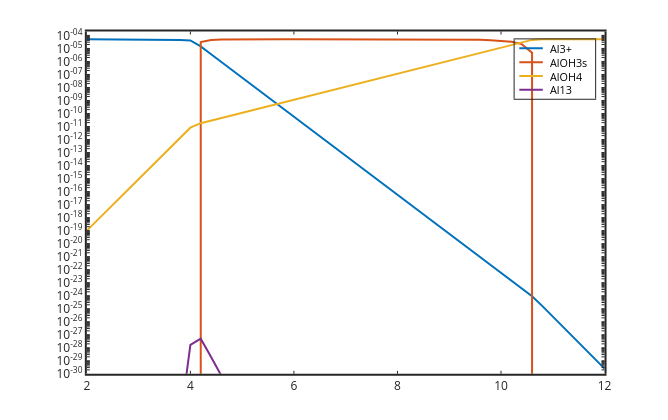

In [51]:
semilogy(pH,Al,'linewidth',2,pH,AlOH3s,'linewidth',2,pH,AlOH4,'linewidth',2, ...
pH,Al13,'linewidth',2)
 set(gca,'linewidth',2,'fontsize',12)
legend('Al3+','AlOH3s','AlOH4','Al13')
axis([2 12 1e-30 2e-4])

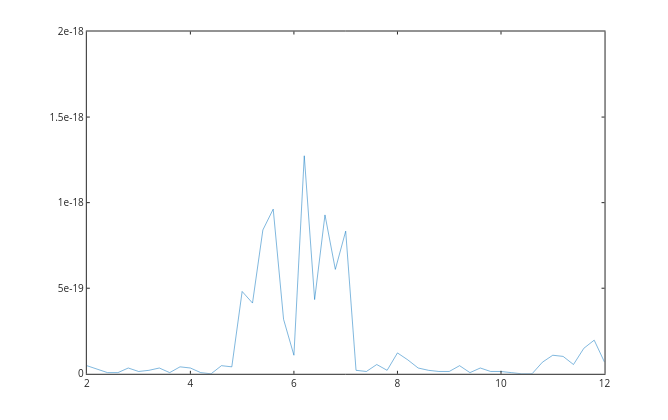

In [52]:
plot(pH,MASSERR)